In [1]:
import numpy as np
import pickle
import json
import os
import sys
import copy
import sklearn.preprocessing
import models
from sklearn.neighbors import NearestNeighbors
import utils
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
DATA_DIR = "../data/fb15k/"
DUMP_FILE = "../Interpretable-KBC/dumps/fb15k_distmult_dump_norm.pkl"
MODEL_TYPE = "distmult"

In [3]:
train_data = utils.read_data(os.path.join(DATA_DIR,"train.txt"))
# dev_data = read_data(os.path.join(DATA_DIR,"valid.txt"))
# test_data = read_data(os.path.join(DATA_DIR,"test.txt"))

In [4]:
with open(DUMP_FILE,"rb") as f:
    dump = pickle.load(f)

In [5]:
dump.keys()

dict_keys(['tail_rel_type', 'entity_type', 'entity_to_id', 'head_rel_type', 'entity_real', 'rel_real', 'relation_to_id'])

## Mapping string to indexes

In [6]:
mapped_train_data = utils.map_data(train_data,dump)
# mapped_dev_data = map_data(dev_data)
# mapped_test_data = map_data(test_data)

In [7]:
index_head=utils.get_head_index(mapped_train_data)

In [8]:
print(len(index_head))

14834


In [21]:
count_r1_r2,temp=utils.get_r1r2_count(mapped_train_data,index_head)

In [23]:
value_list=list(count_r1_r2.values())
# value_list=[len(x) for x in value_list]

In [25]:
cnt=Counter(value_list)

In [26]:
temp=Counter(value_list).most_common()

In [27]:
cnt=sorted(cnt.items())

In [28]:
array=np.array(cnt)
print(array.shape)

(3671, 2)


In [29]:
plt.plot(array[:,1])

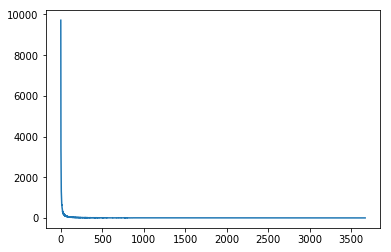

In [30]:
plt.show()

In [31]:
np.percentile(array[:,1],50)

1.0

In [32]:
#y such (r1,r2) pairs in data that are seen x times - seen means (e1,r1,e3) (e3,r2,e2)

In [33]:
temp=np.cumsum(array[:,1])/np.sum(array[:,1])

In [34]:
# print(temp[0:10],array[:10,0])
print(array[temp[:]<0.5],temp[temp[:]<0.5])

[[   1 9717]
 [   2 5396]
 [   3 3376]
 [   4 2759]
 [   5 1952]
 [   6 1680]
 [   7 1316]
 [   8 1168]
 [   9  977]] [ 0.17088441  0.26577915  0.32514992  0.37367005  0.40799817  0.43754287
  0.46068621  0.48122681  0.49840846]
